# Your Title Here

**Name(s)**: (Dawson Tam)

**Website Link**: (your website link)

In [59]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

My partner and I are planning to conduct analysis on the outages dataset. It seems the most relevant and has real world applications; thus, we believe the power outages dataset to be the most appealing.

There are various questions that we can explore when it comes to this dataset. Here are a few of them.

-Which factors most heavily contribute to increasing the duration of a power outage?

-Do different regions/states have different distributions in the number of power outages that they experience?

-Has there been an increase in the number of power outages across the United States due to the increase of rapid urbanization?

## Step 2: Data Cleaning and Exploratory Data Analysis

In [60]:
outages = pd.read_csv("outage.csv")
outages1 = outages.iloc[6:]
column_names = list(outages.iloc[4].values)
#RENAME COLUMNS SO ITS MORE UNDERSTANDABLE
outages1.rename(columns=dict(zip(outages1.columns, column_names)), inplace=True)
outages1

c:\Users\samue\miniforge3\envs\dsc80\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
6,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
7,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
8,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
9,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
10,NaN,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,NaN,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.59964921,2.401765255,2.401765255
1536,NaN,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.59964921,2.401765255,2.401765255
1537,NaN,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.30774418,1.692255822,1.692255822
1538,NaN,1533,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.30774418,1.692255822,1.692255822


In [61]:
#lets check what columns we have to work with
outages1.columns

Index(['variables', 'OBS', 'YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE',
       'NERC.REGION', 'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE',
       'OUTAGE.RESTORATION.TIME', 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL',
       'HURRICANE.NAMES', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW',
       'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE', 'IND.PRICE',
       'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES', 'TOTAL.SALES',
       'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS',
       'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS', 'RES.CUST.PCT',
       'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE', 'PC.REALGSP.USA',
       'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP', 'TOTAL.REALGSP',
       'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION', 'POPPCT_URBAN',
       'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC', 'POPDEN_RURAL',
       'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND', 'PCT_WAT

In [62]:
#CHECK OUT WHICH COLUMNS HAVE MISSING VALUES
columns_with_na = outages1.columns[outages1.isna().any()].tolist()
columns_with_na

['variables',
 'MONTH',
 'CLIMATE.REGION',
 'ANOMALY.LEVEL',
 'CLIMATE.CATEGORY',
 'OUTAGE.START.DATE',
 'OUTAGE.START.TIME',
 'OUTAGE.RESTORATION.DATE',
 'OUTAGE.RESTORATION.TIME',
 'CAUSE.CATEGORY.DETAIL',
 'HURRICANE.NAMES',
 'OUTAGE.DURATION',
 'DEMAND.LOSS.MW',
 'CUSTOMERS.AFFECTED',
 'RES.PRICE',
 'COM.PRICE',
 'IND.PRICE',
 'TOTAL.PRICE',
 'RES.SALES',
 'COM.SALES',
 'IND.SALES',
 'TOTAL.SALES',
 'RES.PERCEN',
 'COM.PERCEN',
 'IND.PERCEN',
 'POPDEN_UC',
 'POPDEN_RURAL']

There are a couple of columns that we don't need. Because we are ultimately trying to predict which variables are going to be the most efffective at determining how long outages last for, we might not need columns such as "OUTAGE.RESTORATION.DATE"."OUTAGE.RESTORATION.TIME", "RES.PRICE".etc. 

In [63]:
#lets take out some of those unecessary columsn
outages1.drop(columns = "OUTAGE.RESTORATION.DATE", inplace = True)


c:\Users\samue\miniforge3\envs\dsc80\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
outages1.drop(columns = "OUTAGE.RESTORATION.TIME", inplace = True)
outages1

,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
6,NaN,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
7,NaN,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
8,NaN,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
9,NaN,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
10,NaN,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,NaN,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.59964921,2.401765255,2.401765255
1536,NaN,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.59964921,2.401765255,2.401765255
1537,NaN,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.30774418,1.692255822,1.692255822
1538,NaN,1533,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.30774418,1.692255822,1.692255822


In [65]:
#drop the first columns too
outages1 = outages1.iloc[:,1:]
outages1

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
6,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,"Friday, July 1, 2011",...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
7,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,"Sunday, May 11, 2014",...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
8,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,"Tuesday, October 26, 2010",...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
9,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,"Tuesday, June 19, 2012",...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
10,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,"Saturday, July 18, 2015",...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,"Tuesday, December 6, 2011",...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.59964921,2.401765255,2.401765255
1536,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.59964921,2.401765255,2.401765255
1537,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,"Saturday, August 29, 2009",...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.30774418,1.692255822,1.692255822
1538,1533,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,"Saturday, August 29, 2009",...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.30774418,1.692255822,1.692255822


In [66]:
#create plotly for the distribution of outage_duration
#fill all na with string 0 because the column is in string
outages1["OUTAGE.DURATION"] = outages1["OUTAGE.DURATION"].fillna("0")
#we have to convert the values in outage.duration to int
outages1["OUTAGE.DURATION"] = outages1["OUTAGE.DURATION"].astype(int)

C:\Users\samue\AppData\Local\Temp\ipykernel_10880\2819744993.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samue\AppData\Local\Temp\ipykernel_10880\2819744993.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
#impute all 0 to the mean of outage_duration
outages1["OUTAGE.DURATION"] = outages1["OUTAGE.DURATION"].replace(0, np.nan)
average_outage_duration = outages1["OUTAGE.DURATION"].mean()
outages1["OUTAGE.DURATION"].fillna(average_outage_duration, inplace = True)
outages1["OUTAGE.DURATION"]

C:\Users\samue\AppData\Local\Temp\ipykernel_10880\906120762.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\samue\miniforge3\envs\dsc80\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



6       3060.000000
7          1.000000
8       3000.000000
9       2550.000000
10      1740.000000
           ...     
1535     720.000000
1536    2771.879828
1537      59.000000
1538     181.000000
1539    2771.879828
Name: OUTAGE.DURATION, Length: 1534, dtype: float64

In [68]:
import plotly.express as px

In [69]:
#rename because the periods are not helpful
outages1.rename(columns = {"OUTAGE.DURATION":"OUTAGE_DURATION"}, inplace = True)
outages1["OUTAGE_DURATION"]

c:\Users\samue\miniforge3\envs\dsc80\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



6       3060.000000
7          1.000000
8       3000.000000
9       2550.000000
10      1740.000000
           ...     
1535     720.000000
1536    2771.879828
1537      59.000000
1538     181.000000
1539    2771.879828
Name: OUTAGE_DURATION, Length: 1534, dtype: float64

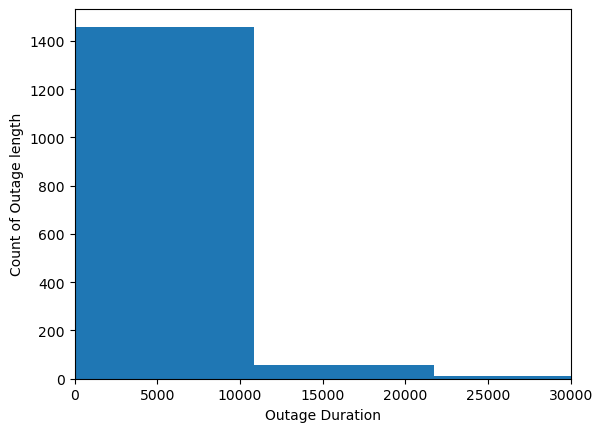

In [70]:
#make distribution of outages duration
import matplotlib.pyplot as plt
plt.hist(outages1["OUTAGE_DURATION"])
plt.xlabel("Outage Duration")
plt.xlim(0, 30000)  # Set x-axis limits
plt.ylabel("Count of Outage length")
plt.show()

In [71]:
#scatter plot showing the number of outages that occur every year
outages1.columns

Index(['OBS', 'YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'CAUSE.CATEGORY',
       'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES', 'OUTAGE_DURATION',
       'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE',
       'IND.PRICE', 'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES',
       'TOTAL.SALES', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN',
       'RES.CUSTOMERS', 'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS',
       'RES.CUST.PCT', 'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE',
       'PC.REALGSP.USA', 'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP',
       'TOTAL.REALGSP', 'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION',
       'POPPCT_URBAN', 'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC',
       'POPDEN_RURAL', 'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND',
       'PCT_WATER_TOT', 'PCT_WATER_INLAND'],
      dtype='object')

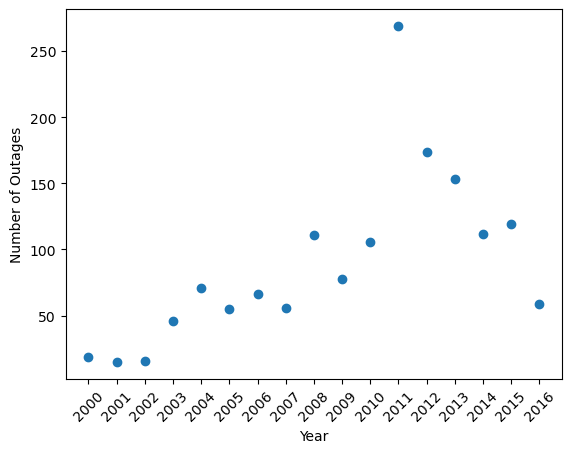

In [72]:
x = outages1.groupby("YEAR").count()["MONTH"].index
y = outages1.groupby("YEAR").count()["MONTH"].values
plt.scatter(x,y)
plt.xlabel("Year")
plt.ylabel("Number of Outages")
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees

plt.show()

Let's do something about the Missingness of some of the columns that we are going to be using later on in the regression portion of this project.

In [73]:
linear_outages1 = outages1[[
    "RES.PRICE"
    ,"CLIMATE.REGION"
    ,"COM.PRICE"
    ,"OUTAGE_DURATION"]]
linear_outages1 = linear_outages1.reset_index()
linear_outages1.head()

,index,RES.PRICE,CLIMATE.REGION,COM.PRICE,OUTAGE_DURATION
0,6,11.6,East North Central,9.18,3060.0
1,7,12.12,East North Central,9.71,1.0
2,8,10.87,East North Central,8.19,3000.0
3,9,11.79,East North Central,9.25,2550.0
4,10,13.07,East North Central,10.16,1740.0


In [74]:
linear_outages1.isna().any()

index              False
RES.PRICE           True
CLIMATE.REGION      True
COM.PRICE           True
OUTAGE_DURATION    False
dtype: bool

In [75]:
linear_outages1.isna().sum()

index               0
RES.PRICE          22
CLIMATE.REGION      6
COM.PRICE          22
OUTAGE_DURATION     0
dtype: int64

In [76]:
#total number of lines in linear_outages1
linear_outages1.shape[0]

1534

The total number of NA rows seemed pretty insignficant in the grand scheme of things, thus we are dropping it for the first round of our model testing.

In [77]:
linear_outages1 = linear_outages1.dropna()
linear_outages1.shape[0]

1507

## Step 3: Assessment of Missingness

In [78]:
outages1[['MONTH',
 'CLIMATE.REGION',
 'ANOMALY.LEVEL',
 'CLIMATE.CATEGORY','OUTAGE.START.TIME',
          'CAUSE.CATEGORY.DETAIL',
 'COM.PRICE',
 'IND.PRICE',
 'RES.SALES',
 'COM.SALES',
 'IND.SALES',
 'TOTAL.SALES',
 'RES.PERCEN',
 'COM.PERCEN',
 'IND.PERCEN',
 'POPDEN_UC',
 'POPDEN_RURAL',"RES.PRICE"
]]

,MONTH,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.TIME,CAUSE.CATEGORY.DETAIL,COM.PRICE,IND.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,POPDEN_UC,POPDEN_RURAL,RES.PRICE
6,7,East North Central,-0.3,normal,5:00:00 PM,NaN,9.18,6.81,2332915,2114774,2113291,6562520,35.54907261,32.22502941,32.20243138,1700.5,18.2,11.6
7,5,East North Central,-0.1,normal,6:38:00 PM,vandalism,9.71,6.49,1586986,1807756,1887927,5284231,30.03248722,34.21038936,35.72756376,1700.5,18.2,12.12
8,10,East North Central,-1.5,cold,8:00:00 PM,heavy wind,8.19,6.07,1467293,1801683,1951295,5222116,28.09767152,34.50101453,37.36598344,1700.5,18.2,10.87
9,6,East North Central,-0.1,normal,4:30:00 AM,thunderstorm,9.25,6.71,1851519,1941174,1993026,5787064,31.99409925,33.54333043,34.43932882,1700.5,18.2,11.79
10,7,East North Central,1.2,warm,2:00:00 AM,NaN,10.16,7.74,2028875,2161612,1777937,5970339,33.9825762,36.20585029,29.77949828,1700.5,18.2,13.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,12,West North Central,-0.9,cold,8:00:00 AM,NaN,7.8,6.2,488853,438133,386693,1313678,37.21254371,33.35162802,29.43590438,1868.2,3.9,8.41
1536,NaN,West North Central,NaN,NaN,NaN,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1868.2,3.9,NaN
1537,8,West North Central,0.5,warm,10:54:00 PM,NaN,7.47,5.53,337874,370771,215406,924051,36.56443205,40.12451694,23.31105101,1905.4,4.7,9.25
1538,8,West North Central,0.5,warm,11:00:00 AM,NaN,7.47,5.53,337874,370771,215406,924051,36.56443205,40.12451694,23.31105101,1905.4,4.7,9.25


Relevant Columns:

MONTH - The Month Column has no correlation whatsoever with any other column so thus it MCAR.

'CLIMATE.REGION' - MCAR because Climate Region relies on National Centers for Environmental Information which is outside the scope of this df.

'ANOMALY.LEVEL - Anomaly level and climate category refer to each other so thus missing values in Anomaly Level are MAR.

'CLIMATE.CATEGORY' - Climate Category relies on Climate region so if Climate Region is missing then Climate Category is also missing. This makes it MAR.

‘CAUSE.CATEGORY.DETAIL' - This variable is a detailed description of the cause of the outage. Missingess relies on the value itself so this is NMAR. 

'RES.PRICE' - Despite these next 3 columns all deal with prices in various sectors they are NMAR as they aren;t related to one another and the missing is instead to the individual value itself. This applies to COMP.PRICE, IND.PRICE,RES.SALES,COM.SALES,IND.SALES
 'COM.PRICE', 
 'IND.PRICE', 
'RES.SALES', 
 'COM.SALES' : 
 'IND.SALES',

'TOTAL.SALES', Total Sales relies on RES, Com, and Ind Sales so it would be MAR

The reason is that the percentage of residential, commercial, and industrial electricity consumption compared to the total consumption so they are mar
 'RES.PERCEN',
 'COM.PERCEN',
 'IND.PERCEN',  

'POPDEN_UC',  MCAR because it does not rely on any columns

'POPDEN_RURAL'   MCAR because it does not rely on any columns


### CUSTOMERS.AFFECTED and POSTAL.CODE (MCAR)

Null Hypothesis: The missingness of Customers Affected does not depend on Postal Code

Alternative Hypothesis: The missingness of Customers Affected depend on Postal Code

#### Test Statistic

In [79]:

# Create a DataFrame indicating missing values (1) and non-missing values (0) in 'CUSTOMERS.AFFECTED' column
missing_indicator = outages1[['CUSTOMERS.AFFECTED', 'POSTAL.CODE']].assign(is_missing=outages1['CUSTOMERS.AFFECTED'].isna())
missing_indicator = missing_indicator.drop(columns=['CUSTOMERS.AFFECTED'])
pivot_table = missing_indicator.pivot_table(index='is_missing', columns='POSTAL.CODE', aggfunc='size', fill_value=0)
pivot_table

POSTAL.CODE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
is_missing,,,,,,,,,,,,,,,,,,,,,
False,1,5,13,9,127,11,13,9,24,44,...,0,17,94,22,34,5,44,10,3,3
True,0,1,12,19,83,4,5,1,17,1,...,2,17,33,19,3,4,53,10,1,3


In [80]:
column_sum = pivot_table.sum(axis=0)
# Divide each column by its sum to get proportions
proportions = pivot_table.div(column_sum, axis=1)
proportions

POSTAL.CODE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
is_missing,,,,,,,,,,,,,,,,,,,,,
False,1.0,0.833333,0.52,0.321429,0.604762,0.733333,0.722222,0.9,0.585366,0.977778,...,0.0,0.5,0.740157,0.536585,0.918919,0.555556,0.453608,0.5,0.75,0.5
True,0.0,0.166667,0.48,0.678571,0.395238,0.266667,0.277778,0.1,0.414634,0.022222,...,1.0,0.5,0.259843,0.463415,0.081081,0.444444,0.546392,0.5,0.25,0.5


We're analyzing missing values in the 'CUSTOMERS.AFFECTED' column of the dataset. We've created an indicator showing missing (1) and non-missing (0) values. Then, we're calculating Total Variation Distance (TVD) for these proportions. This helps measure the difference in distribution between missing and non-missing values across postal codes.

In [81]:
observe_tvd = proportions.diff().abs().sum(axis=1).iloc[-1]
observe_tvd

25.021954716018406

#### Permutation Test

In [82]:
# Number of permutations
n_permutations = 1000

# Initialize an array to store permuted differences
permuted_diffs = []

# Perform permutations and calculate differences
for i in range(n_permutations):
    shuffled_categories = np.random.permutation(outages1['POSTAL.CODE'])
    shuffled_df = outages1.copy()
    shuffled_df['POSTAL.CODE'] = shuffled_categories

    missing_indicator = shuffled_df[['CUSTOMERS.AFFECTED', 'POSTAL.CODE']].assign(is_missing=shuffled_df['CUSTOMERS.AFFECTED'].isna())
    missing_indicator = missing_indicator.drop(columns=['CUSTOMERS.AFFECTED'])
    pivot_table = missing_indicator.pivot_table(index='is_missing', columns='POSTAL.CODE', aggfunc='size', fill_value=0)
    column_sum = pivot_table.sum(axis=0)

    # Divide each column by its sum to get proportions
    proportions = pivot_table.div(column_sum, axis=1)
    tvd = proportions.diff().abs().sum(axis=1).iloc[-1]
    
    # Append the calculated TVD to the list
    permuted_diffs.append(tvd)

# Convert the list of TVDs to a NumPy array
permuted_diffs = np.array(permuted_diffs)

# Calculate the p-value
p_value = np.sum(permuted_diffs >= observe_tvd) / n_permutations

p_value


0.059

Below is the graph of our result of permutation test, our p-value is greater than our significance level of 5%, so we fail to reject the null hypothesis. The significance of this is that it is highly possible that the missingness of Customer Affected does not depend on Postal Code.


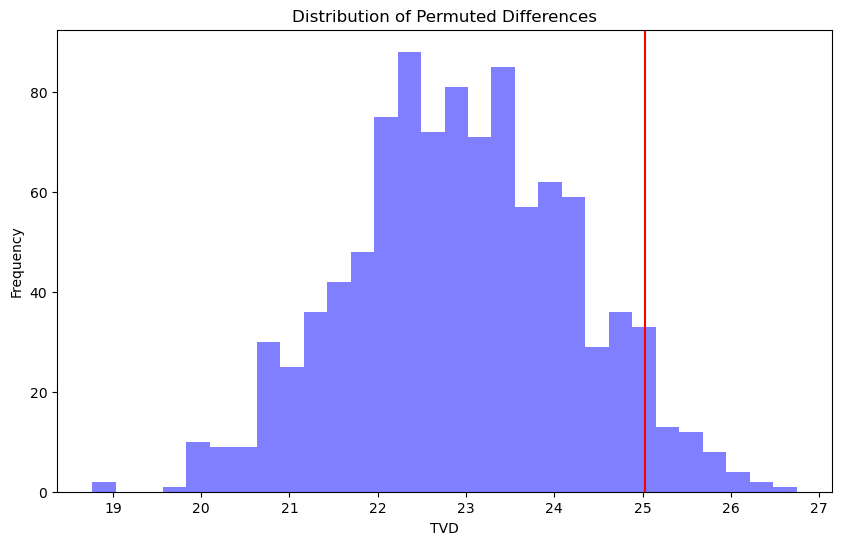

In [83]:

plt.figure(figsize=(10, 6))
plt.hist(permuted_diffs, bins=30, alpha=0.5, color='blue', label='Permuted Differences')
plt.axvline(observe_tvd, color='red')
plt.xlabel('TVD')
plt.ylabel('Frequency')
plt.title('Distribution of Permuted Differences')
plt.show()

### CUSTOMERS.AFFECTED and OUTAGE_DURATION (MAR)

Null Hypothesis: The missingness of CUSTOMERS.AFFECTED does not depend on OUTAGE_DURATION

Alternative Hypothesis: The missingness of CUSTOMERS.AFFECTED depend on OUTAGE_DURATION

#### Test Statistic

In [84]:
missing_indic = outages1[['CUSTOMERS.AFFECTED', 'OUTAGE_DURATION']].assign(is_missing=outages1['CUSTOMERS.AFFECTED'].isna())
missing_indic = missing_indic.drop(columns=['CUSTOMERS.AFFECTED'])
observed_diff = missing_indic.groupby('is_missing').mean().diff().abs().iloc[-1]
observed_diff

OUTAGE_DURATION    730.670575
Name: True, dtype: float64

#### Permutation Test

In [85]:
n_permutations = 1000
permutation_results = []

for _ in range(n_permutations):
    # Shuffle the 'is_missing' indicator
    shuffled_categories = np.random.permutation(outages1['OUTAGE_DURATION'])
    shuffled_df = outages1.copy()
    shuffled_df['OUTAGE_DURATION'] = shuffled_categories

    missing_indic = shuffled_df[['CUSTOMERS.AFFECTED', 'OUTAGE_DURATION']].assign(is_missing=shuffled_df['CUSTOMERS.AFFECTED'].isna())
    missing_indic = missing_indic.drop(columns=['CUSTOMERS.AFFECTED'])
    test_diff = missing_indic.groupby('is_missing').mean().diff().abs().iloc[-1]
    permutation_results.append(test_diff)

permuted_diffs = np.array(permutation_results)

p_value = np.sum(permuted_diffs >= observed_diff[-1]) / n_permutations

p_value

0.028

Below is the graph and the output of permutation test. Our p-value is less than our significance level of 5%, so we reject the null hypothesis. The significance of this is that it is highly possible that the missingness of Customer Affected depends on outage duration.


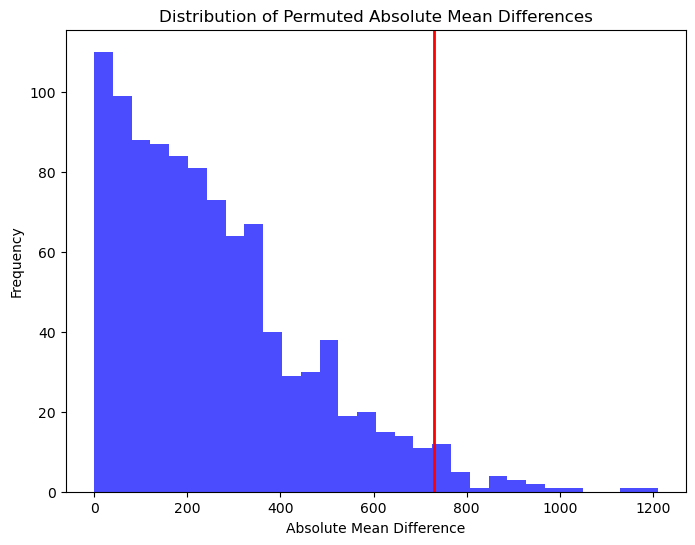

In [86]:

plt.figure(figsize=(8, 6))
plt.hist(permuted_diffs, bins=30, alpha=0.7, color='blue', label='Permuted Differences')
plt.axvline(x=observed_diff[-1], color='red', linestyle='-', linewidth=2, label='Observed Difference')
plt.xlabel('Absolute Mean Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Permuted Absolute Mean Differences')
plt.show()

## Step 4: Hypothesis Testing

In [87]:
outages1.loc[:, "RES.PRICE"] = pd.to_numeric(outages1["RES.PRICE"])

c:\Users\samue\miniforge3\envs\dsc80\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
res_price_mean = outages1["RES.PRICE"].mean()
res_price_mean

11.96837301587301

### DEFINING THE HYPOTHESIS

Null Hypothesis: The mean duration of power outages in areas with a RES.PRICE > 11.5 are the same as the mean duration of power outages in areas witha. RES.pRICE <= 11.5. 

Alternative Hypothesis: The mean duration of power outages in areas with a RES.PRICE > 11.5 are different than the mean duration of power outages in areas witha. RES.pRICE <= 11.5. 

In [89]:
#make a new columned called "RES.PRICE < 11.5" where the values are either true and false
#this way we can group the RES.PRICE column into either of those groups for our permutation test.


outages1["RES.PRICE <= 11.5"] = outages1["RES.PRICE"] <= 11.5
outages1["RES.PRICE <= 11.5"].value_counts()

False    775
True     759
Name: RES.PRICE <= 11.5, dtype: int64

In [90]:
#How many residential areas are in each group and what is the mean ANOMALY.LEVEL in each group?

outages1.loc[:, "ANOMALY.LEVEL"] = pd.to_numeric(outages1["ANOMALY.LEVEL"])

outages1.groupby("RES.PRICE <= 11.5")["ANOMALY.LEVEL"].agg(["mean","count"])

,mean,count
RES.PRICE <= 11.5,,
False,-0.105744,766
True,-0.087879,759


Let's visualize the distribution of anomaly.levels in places with a res.price <= 11.5 and places with a res.price > 11.5

In [91]:
#Visualize the distribution of ANOMALY.LEVELS across both groups

anomalies = outages1[["RES.PRICE <= 11.5", "ANOMALY.LEVEL"]]

fig = px.histogram(anomalies, color='RES.PRICE <= 11.5', histnorm='probability', marginal='box', 
                   title="ANOMALY.LEVEL by RES.PRICE groups", barmode='overlay', opacity=0.7)
fig

From this distribution above, its difficulat to tell whether or not there is a difference between the two groups.

### Test Statistic Calculations

Before we begin our permuation test, let's see what our observed statistic is. For the sake of our hypothesis testing, we will be using the difference in grouped means.

In [92]:
#the test statistic that we are going to be using is the difference in group means
anomaly_mean = anomalies["ANOMALY.LEVEL"].mean()

#we cant impute the mean because that might skew either group and make the two distributions look more similiar
anomalies.dropna()

grouped_means = anomalies.groupby("RES.PRICE <= 11.5")["ANOMALY.LEVEL"].mean()
grouped_means

RES.PRICE <= 11.5
False   -0.105744
True    -0.087879
Name: ANOMALY.LEVEL, dtype: float64

In [93]:
#what is our observed statistic?

grouped_means.diff().iloc[1]

0.017865337447582882

Our observed difference in grouped means is 0.01786

### Permutation Test

Now that we've calculated our observed statistic. Let' begin our comparison of these two samples by doing a permutation test. In order to do this test, we are goingt o be randomly shuffling around the values of ANOMALY.LEVEL. We are not shuffling around the RES.PRICE groups so that we can still groupby the "RES.PRICE" later on in our loop.

Once again, the question that we are trying to answer is that how likely is it that one random shuffle gives us a difference in grouped means (RES.PRICE <= 11.5 & RES.PRICE > 11.5) of 0.01786?

In [94]:
#shuffle the ANOMALY.LEVEL COLUMNS FIRST
with_shuffled = anomalies.assign(Shuffled_anomaly=np.random.permutation(outages1['ANOMALY.LEVEL']))
group_means = with_shuffled.groupby('RES.PRICE <= 11.5').mean()
group_means

,ANOMALY.LEVEL,Shuffled_anomaly
RES.PRICE <= 11.5,,
False,-0.105744,-0.064851
True,-0.087879,-0.129576


In [95]:
#begin running the permutation test by shuffling the anomaly.level

n_repetitions = 500

differences = []
for i in range(n_repetitions):
    
    with_shuffled = anomalies.assign(Shuffled_anomaly=np.random.permutation(anomalies['ANOMALY.LEVEL']))

    # Step 2: Compute the test statistic.
    # Remember, False (0) comes before True (1),
    # so this computes True - False.
    grouped_means = (
        with_shuffled
        .groupby('RES.PRICE <= 11.5')
        .mean()
        .loc[:, 'Shuffled_anomaly']
    )
    difference = grouped_means.diff().iloc[-1]
    
    # Step 4: Store the result
    differences.append(difference)
    
differences[:10]

[-0.05766251100836635,
 0.07089865722631053,
 -0.02537560163348436,
 -0.02119377876855119,
 0.006628375426174976,
 -0.010414989437758482,
 -0.014643879348304717,
 0.08244107518225324,
 -0.03979659943989154,
 0.012137256723329437]

In [96]:
#heres the observed statistic once again
grouped_means = anomalies.groupby("RES.PRICE <= 11.5")["ANOMALY.LEVEL"].mean()
observed_difference = grouped_means.diff().iloc[1]
observed_difference

0.017865337447582882

### Conclusion

After permutating and shuffling the groups 500 times. We have our observed statistic as well as our simulated difference. By plotting a histogram of the simulated differences against the actauly observed statistic we can answer our question from before.

In [97]:
fig = px.histogram(
    pd.DataFrame(differences), x=0, nbins=50, histnorm='probability', 
    title='Empirical Distribution of the Mean Differences <br> in ANOMALY.LEVELS (RES.PRICE <= 11.5 & RES.PRICE > 11.5)')
fig.add_vline(x=observed_difference, line_color='red')
fig.update_layout(xaxis_range=[-0.2, 0.2], margin=dict(t=60))

Under the null hypothesis, we can regularly see a difference like 0.01786. Therefore we fail to reject the null hypothesis that these two groups come the same distribution. The difference between the two samples is not statistically significant. 

## Step 5: Framing a Prediction Problem

In [98]:
outages1.head()

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,...,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,RES.PRICE <= 11.5
6,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,"Friday, July 1, 2011",...,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983,False
7,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,"Sunday, May 11, 2014",...,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983,False
8,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,"Tuesday, October 26, 2010",...,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983,True
9,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,"Tuesday, June 19, 2012",...,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983,False
10,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,"Saturday, July 18, 2015",...,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983,False


Notebook: We want to predict the duration of a power outages based on the following features: “RES.PRICE”, “IND.PRICE”, “CLIMATE.REGION”, “CLIMATE.CATEGORY”, “COM.PRICE”.

These are the features that we are going to be using because these are the only features that we can be sure of before the power outage itself. Other factors like “CUSTOMERS.AFFECTED” wouldnt be known to us before the start of the power outage. Thus, these features are going to be the ones we’re training our Regression model on. 

To recap, our response variable is going to be “OUTAGE.DURATION” and our features that we are going to be using are “RES.PRICE”, “IND.PRICE”, “CLIMATE.REGION”, “CLIMATE.CATEGORY”, “COM.PRICE”, . The metric that we are going to be using to determine the accuracy of our model is the RMSE as well as the R^2. 


## Step 6: Baseline Model

As stated before, we are going to be running a Multi-Linear Regression model, lets begin trianing that model.

In [99]:
linear_outages1.columns
linear_outage = linear_outages1.copy()

Make a subset of outages1 with all the relevant features for our linear regression model. This will also help us with the tranformation of necessary columns so that we can run the Multi Linear Regression on it. 

In [100]:
linear_outages1.head()

,index,RES.PRICE,CLIMATE.REGION,COM.PRICE,OUTAGE_DURATION
0,6,11.6,East North Central,9.18,3060.0
1,7,12.12,East North Central,9.71,1.0
2,8,10.87,East North Central,8.19,3000.0
3,9,11.79,East North Central,9.25,2550.0
4,10,13.07,East North Central,10.16,1740.0


In [101]:
types = linear_outages1.dtypes
types

index                int64
RES.PRICE           object
CLIMATE.REGION      object
COM.PRICE           object
OUTAGE_DURATION    float64
dtype: object

In [102]:
'''#OHE CLIMATE.REGION
linear_outage = pd.get_dummies(linear_outages1, columns=['CLIMATE.REGION'])
#convert COM.PRICE to float
linear_outage["COM.PRICE"] = linear_outages1["COM.PRICE"].astype(float)
'''

'#OHE CLIMATE.REGION\nlinear_outage = pd.get_dummies(linear_outages1, columns=[\'CLIMATE.REGION\'])\n#convert COM.PRICE to float\nlinear_outage["COM.PRICE"] = linear_outages1["COM.PRICE"].astype(float)\n'

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = linear_outages1[['RES.PRICE','CLIMATE.REGION','COM.PRICE']]
y = linear_outages1['OUTAGE_DURATION']
one_hot_encoder = ColumnTransformer(
    transformers=[
    ("onehot", OneHotEncoder(), ['CLIMATE.REGION']),
    ("convert_com_price", FunctionTransformer(lambda x: x.astype(float)), ['COM.PRICE'])
],
    remainder="passthrough"
)
pipeline = Pipeline([
    ('one_hot_encoder', one_hot_encoder),
    ('linear',LinearRegression())
])
pipeline

Pipeline(steps=[('one_hot_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['CLIMATE.REGION']),
                                                 ('convert_com_price',
                                                  FunctionTransformer(func=<function <lambda> at 0x000001E43A78E040>),
                                                  ['COM.PRICE'])])),
                ('linear', LinearRegression())])

Training Data

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_outage_transformed = pipeline.fit(X_train,y_train)

In [123]:
y_pred = pipeline.predict(X_test)
#R^2
r_square = pipeline.score(X_test,y_test)
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred,squared=False)

# Calculate root mean squared error
print("Root Mean Squared Error (RMSE):", mse)
print("R^2:", r_square)

Root Mean Squared Error (RMSE): 5422.788651135219
R^2: 0.0016404015465789623


In [126]:
linear_regression_model = pipeline.named_steps['linear']
linear_coefficients = linear_regression_model.coef_
linear_regression_model.intercept_

3763.29055545773

Our intial model isnt very accurate at all. The RMSE is incredible high and the r^2 is incredible low. We have to make lots of adjustments going into our final model.

In [106]:
'''linear_outage  = linear_outage.reset_index()
linear_outage.head()'''

'linear_outage  = linear_outage.reset_index()\nlinear_outage.head()'

In [107]:
'''linear_outage.columns'''

'linear_outage.columns'

In [108]:
'''multi_linear = LinearRegression()
multi_linear.fit(X = linear_outage[['RES.PRICE', 'COM.PRICE',
       'CLIMATE.REGION_Central', 'CLIMATE.REGION_East North Central',
       'CLIMATE.REGION_Northeast', 'CLIMATE.REGION_Northwest',
       'CLIMATE.REGION_South', 'CLIMATE.REGION_Southeast',
       'CLIMATE.REGION_Southwest', 'CLIMATE.REGION_West',
       'CLIMATE.REGION_West North Central']],
                 y = linear_outage["OUTAGE_DURATION"])'''

'multi_linear = LinearRegression()\nmulti_linear.fit(X = linear_outage[[\'RES.PRICE\', \'COM.PRICE\',\n       \'CLIMATE.REGION_Central\', \'CLIMATE.REGION_East North Central\',\n       \'CLIMATE.REGION_Northeast\', \'CLIMATE.REGION_Northwest\',\n       \'CLIMATE.REGION_South\', \'CLIMATE.REGION_Southeast\',\n       \'CLIMATE.REGION_Southwest\', \'CLIMATE.REGION_West\',\n       \'CLIMATE.REGION_West North Central\']],\n                 y = linear_outage["OUTAGE_DURATION"])'

Lets take a look at the coefficients of our Linear Regression we just fit

In [109]:
'''multi_linear.coef_'''

'multi_linear.coef_'

Having fit our model, we can look at the RMSE and R^2 values to judge the accuracy of our model.

In [110]:
'''def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred) ** 2))'''

'def rmse(actual, pred):\n    return np.sqrt(np.mean((actual - pred) ** 2))'

In [111]:
'''RMSE = rmse(
    linear_outage['OUTAGE_DURATION'], multi_linear.predict(X = linear_outage[['RES.PRICE', 'COM.PRICE',
       'CLIMATE.REGION_Central', 'CLIMATE.REGION_East North Central',
       'CLIMATE.REGION_Northeast', 'CLIMATE.REGION_Northwest',
       'CLIMATE.REGION_South', 'CLIMATE.REGION_Southeast',
       'CLIMATE.REGION_Southwest', 'CLIMATE.REGION_West',
       'CLIMATE.REGION_West North Central']]))

RMSE'''

"RMSE = rmse(\n    linear_outage['OUTAGE_DURATION'], multi_linear.predict(X = linear_outage[['RES.PRICE', 'COM.PRICE',\n       'CLIMATE.REGION_Central', 'CLIMATE.REGION_East North Central',\n       'CLIMATE.REGION_Northeast', 'CLIMATE.REGION_Northwest',\n       'CLIMATE.REGION_South', 'CLIMATE.REGION_Southeast',\n       'CLIMATE.REGION_Southwest', 'CLIMATE.REGION_West',\n       'CLIMATE.REGION_West North Central']]))\n\nRMSE"

In [112]:
'''multi_linear.score(linear_outage[['RES.PRICE', 'COM.PRICE',
       'CLIMATE.REGION_Central', 'CLIMATE.REGION_East North Central',
       'CLIMATE.REGION_Northeast', 'CLIMATE.REGION_Northwest',
       'CLIMATE.REGION_South', 'CLIMATE.REGION_Southeast',
       'CLIMATE.REGION_Southwest', 'CLIMATE.REGION_West',
       'CLIMATE.REGION_West North Central']], linear_outage['OUTAGE_DURATION'])'''

"multi_linear.score(linear_outage[['RES.PRICE', 'COM.PRICE',\n       'CLIMATE.REGION_Central', 'CLIMATE.REGION_East North Central',\n       'CLIMATE.REGION_Northeast', 'CLIMATE.REGION_Northwest',\n       'CLIMATE.REGION_South', 'CLIMATE.REGION_Southeast',\n       'CLIMATE.REGION_Southwest', 'CLIMATE.REGION_West',\n       'CLIMATE.REGION_West North Central']], linear_outage['OUTAGE_DURATION'])"

## Step 7: Final Model

In [119]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
final_model = grid_search.best_estimator_

# Evaluate the final model
final_model_score = final_model.score(X_test, y_test)

ValueError: Invalid parameter model for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

## Step 8: Fairness Analysis

In [ ]:
# TODO